In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [2]:
# utility functions

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

# Function to calculate MAE and MAPE
def calculate_errors(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    return mae, mape

In [3]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

In [4]:
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [5]:
# splitting data in test and train split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.25)

In [6]:
# 1. Multivariate Linear Regression
linear_model = LinearRegression()
linear_model.fit(diabetes_X_train, diabetes_y_train)

y_pred_linear_test = linear_model.predict(diabetes_X_test)
y_pred_linear_train = linear_model.predict(diabetes_X_train)

mae_linear_test, mape_linear_test = calculate_errors(diabetes_y_test, y_pred_linear_test)
mae_linear_train, mape_linear_train = calculate_errors(diabetes_y_train, y_pred_linear_train)

In [7]:
# 2. Multivariate Polynomial Regression (2nd Degree)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(diabetes_X_train)
X_test_poly = poly_features.transform(diabetes_X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, diabetes_y_train)

y_pred_poly_test = poly_model.predict(X_test_poly)
y_pred_poly_train = poly_model.predict(X_train_poly)

mae_poly_test, mape_poly_test = calculate_errors(diabetes_y_test, y_pred_poly_test)
mae_poly_train, mape_poly_train = calculate_errors(diabetes_y_train, y_pred_poly_train)

In [8]:
print("Train MAE for Linear Model:", mae_linear_train)
print("Test MAE for Linear Model:", mae_linear_test)
print("\nTrain MAPE for Linear Model:", mape_linear_train)
print("Test MAPE for Linear Model:", mape_linear_test)
print("---------------------------------------------------")
print("Train MAE for Polynomial Model:", mae_poly_train)
print("Test MAE for Polynomial Model:", mae_poly_test)
print("\nTrain MAPE for Polynomial Model:", mape_poly_train)
print("Test MAPE for Polynomial Model:", mape_poly_test)

Train MAE for Linear Model: 43.62809300903985
Test MAE for Linear Model: 42.48519447081743

Train MAPE for Linear Model: 38.72591087296689
Test MAPE for Linear Model: 39.16552830667557
---------------------------------------------------
Train MAE for Polynomial Model: 39.14577356636698
Test MAE for Polynomial Model: 43.398801120184864

Train MAPE for Polynomial Model: 33.967736279420556
Test MAPE for Polynomial Model: 40.06753116814396


Test Dataset: Mean Absolute Error: 42.49
Train Dataset: Mean Absolute Error: 43.63
y = -0.12 * x_0 + -24.09 * x_1 + 5.80 * x_2 + 1.24 * x_3 + -1.64 * x_4 + 1.13 * x_5 + 1.30 * x_6 + 12.21 * x_7 + 80.63 * x_8 + 0.19 * x_9 + -402.78


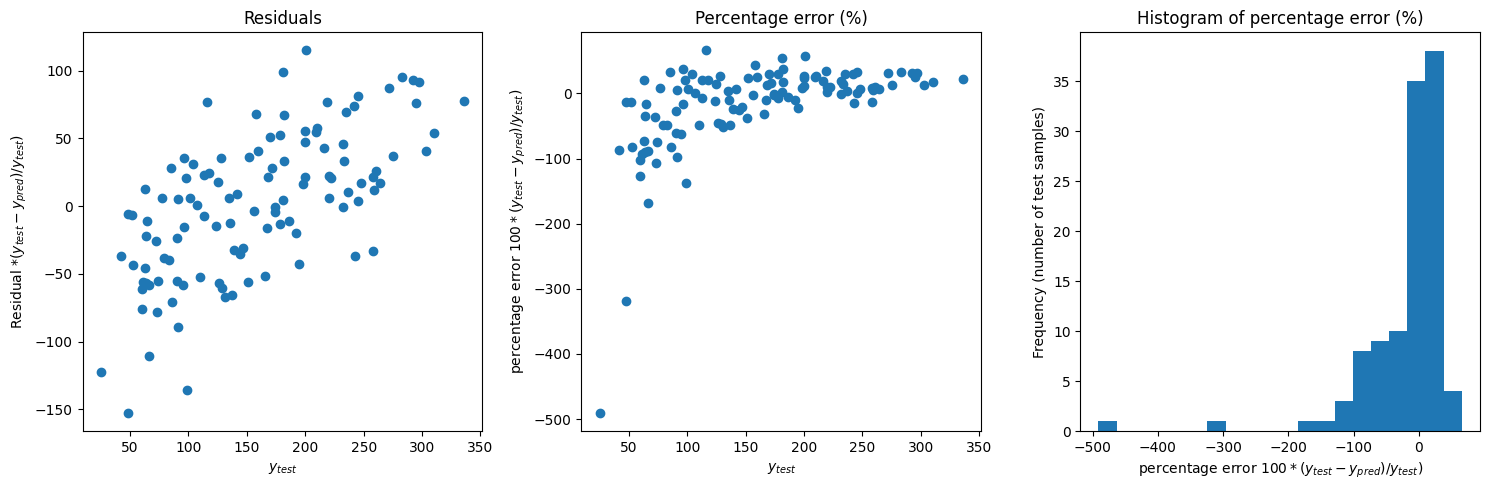

In [9]:
model_estimation(linear_model, diabetes_y_train, diabetes_y_test, y_pred_linear_train, y_pred_linear_test)

Test Dataset: Mean Absolute Error: 43.40
Train Dataset: Mean Absolute Error: 39.15
y = -5.19 * x_0 + 5.29 * x_1 + -22.18 * x_2 + -1.40 * x_3 + -55.68 * x_4 + 59.56 * x_5 + 51.90 * x_6 + -46.59 * x_7 + -1347.15 * x_8 + -14.69 * x_9 + 0.04 * x_10 + 1.55 * x_11 + -0.03 * x_12 + -0.02 * x_13 + 0.00 * x_14 + -0.01 * x_15 + 0.00 * x_16 + 0.12 * x_17 + 0.48 * x_18 + 0.01 * x_19 + 15.88 * x_20 + 2.57 * x_21 + 0.34 * x_22 + 2.89 * x_23 + -2.55 * x_24 + -2.74 * x_25 + -15.33 * x_26 + -78.27 * x_27 + 0.59 * x_28 + 0.06 * x_29 + 0.09 * x_30 + -0.08 * x_31 + 0.06 * x_32 + 0.21 * x_33 + 0.90 * x_34 + 2.11 * x_35 + -0.02 * x_36 + -0.00 * x_37 + -0.04 * x_38 + 0.04 * x_39 + 0.02 * x_40 + -0.41 * x_41 + 1.81 * x_42 + -0.05 * x_43 + 0.09 * x_44 + -0.15 * x_45 + -0.16 * x_46 + -0.73 * x_47 + 4.84 * x_48 + -0.07 * x_49 + 0.06 * x_50 + 0.13 * x_51 + 0.48 * x_52 + -5.64 * x_53 + 0.05 * x_54 + 0.05 * x_55 + 0.10 * x_56 + -5.06 * x_57 + 0.14 * x_58 + 0.16 * x_59 + 16.73 * x_60 + 1.00 * x_61 + 186.51 * x_62 + 

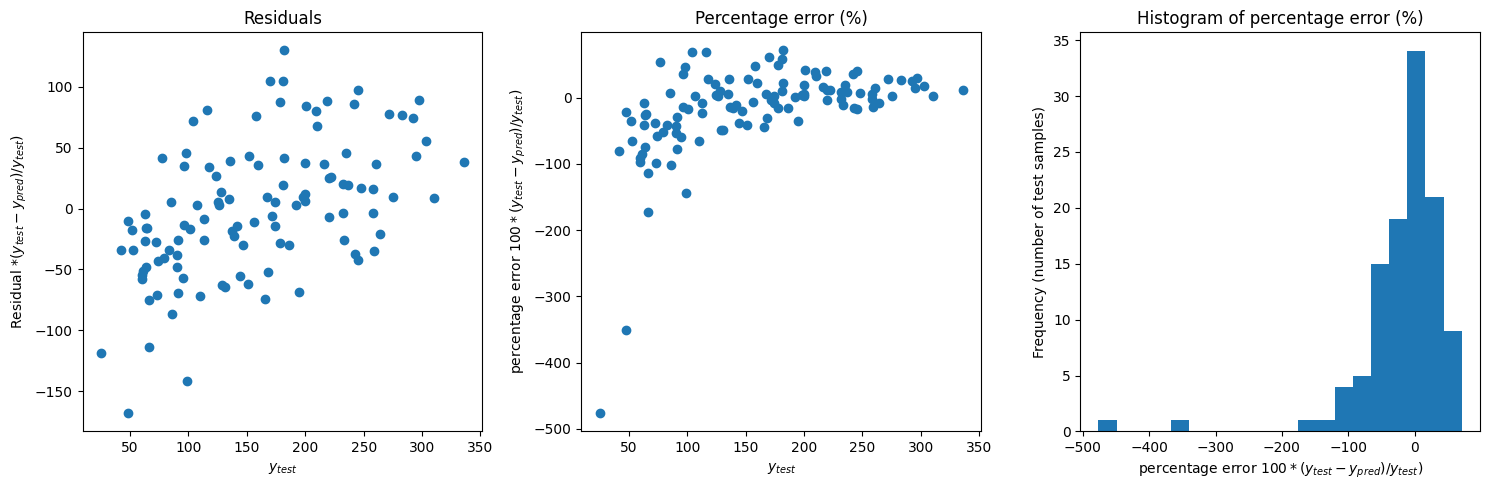

In [10]:
model_estimation(poly_model, diabetes_y_train, diabetes_y_test, y_pred_poly_train, y_pred_poly_test)

In [11]:
# Quesion 1: How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values.

"""
In linear regression, the number of parameters is equal to the number of features.
So linear regression has 10 parameters

Now for polynomial regression of 2nd degree.
10 (original) + 10 (each feature squared) + 45 (all possible combination between all features) = 65
Below is the code for listing all features.
"""
poly_features.get_feature_names_out(), len(poly_features.get_feature_names_out()) 

(array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
        'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
        'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
        'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
        'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
        'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
        'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
        's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
        's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
        's5^2', 's5 s6', 's6^2'], dtype=object),
 65)

In [12]:
# Question 2: Which model would you choose for deployment, and why?

"""
MAE and MAPE of Linear model is almost same as the polynomial regression. Apart from this linear model would be faster to predict
since there's only 10 features and polynomial would be complicated and time consuming on production scale. So its clear that
Linear model is better for deployment when accuracy difference isn't that much.
"""

"\nMAE and MAPE of Linear model is almost same as the polynomial regression. Apart from this linear model would be faster to predict\nsince there's only 10 features and polynomial would be complicated and time consuming on production scale. So its clear that\nLinear model is better for deployment when accuracy difference isn't that much.\n"

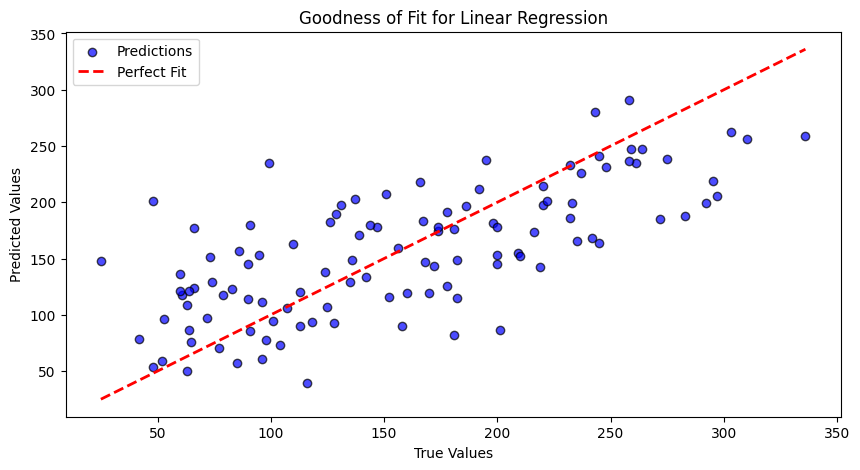

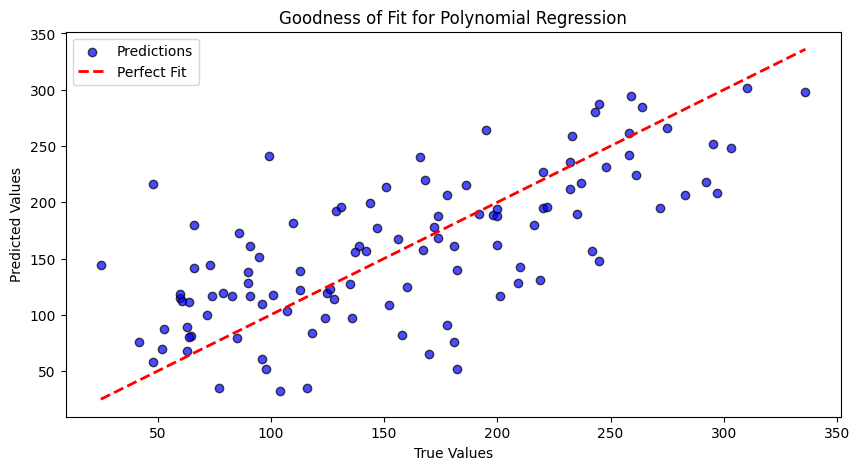

In [13]:
# What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

def plot_goodness_of_fit(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_true, y_pred, color='blue', edgecolor='k', alpha=0.7, label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Goodness of Fit for {model_name}')
    plt.legend()
    plt.show()

# Plotting for linear regression
plot_goodness_of_fit(diabetes_y_test, y_pred_linear_test, "Linear Regression")

# Plotting for polynomial regression
plot_goodness_of_fit(diabetes_y_test, y_pred_poly_test, "Polynomial Regression")


In [14]:
"""
Plot of both models look almost similar. Although we know MAE and MAPE values of both the model and there's only slight
difference between both the models. So we can say that linear model is much better choice in terms of performance and 
accuracy for production level.
"""

"\nPlot of both models look almost similar. Although we know MAE and MAPE values of both the model and there's only slight\ndifference between both the models. So we can say that linear model is much better choice in terms of performance and \naccuracy for production level.\n"